# Elements de réponse pour interview Data Science

- Quelles sont les 20 premières stations en terme de validations ?

- Proposez une illustration graphique de ce classement.

- Proposez une classification des arrêts en vous basant sur le nombre de validations par catégorie de titre ?

- Quelles prédictions pouvez vous faire pour le nombre de validations dans les stations "OLYMPIADES" et "M. MONTROUGE" sur la plage du 24 au 30 juin ?

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
# The separator in the file is ";" according to documentation.
data = pd.read_csv("validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-sem.csv", sep = ";")



In [3]:
# Check visually the aspect of the data
data.head(10)


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2020-01-25,800,822,2105,LES PAVILLONS-SOUS-BOIS,NaN,AMETHYSTE,11
1,2020-01-25,800,822,2107,LYCEE HENRI SELLIER,NaN,AMETHYSTE,Moins de 5
2,2020-01-25,800,822,2107,LYCEE HENRI SELLIER,NaN,IMAGINE R,44
3,2020-01-25,800,822,2107,LYCEE HENRI SELLIER,NaN,TST,Moins de 5
4,2020-01-25,800,822,2108,L'ABBAYE,NaN,AMETHYSTE,7
5,2020-01-25,800,822,2108,L'ABBAYE,NaN,IMAGINE R,17
6,2020-01-25,800,822,2110,ROUGEMONT-CHANTELOUP,NaN,IMAGINE R,24
7,2020-01-25,800,822,2111,AULNAY-SOUS-BOIS,NaN,AMETHYSTE,37
8,2020-01-25,800,822,2111,AULNAY-SOUS-BOIS,NaN,AUTRE TITRE,Moins de 5
9,2020-01-25,800,822,2111,AULNAY-SOUS-BOIS,NaN,NON DEFINI,9


In [4]:
# Expected : 835141 rows according to documentation
data.shape

(835141, 8)

In [5]:
#Check the types in dataset - the ones we can process and the ones we have to transform 
data.dtypes

JOUR                object
CODE_STIF_TRNS       int64
CODE_STIF_RES       object
CODE_STIF_ARRET     object
LIBELLE_ARRET       object
ID_REFA_LDA        float64
CATEGORIE_TITRE     object
NB_VALD             object
dtype: object

In [6]:
data.select_dtypes(include = ['int64','float64'])

,CODE_STIF_TRNS,ID_REFA_LDA
0,800,NaN
1,800,NaN
2,800,NaN
3,800,NaN
4,800,NaN
...,...,...
835136,100,71334.0
835137,100,71334.0
835138,100,71777.0
835139,100,71202.0


In [7]:
data.columns

Index(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
       'LIBELLE_ARRET', 'ID_REFA_LDA', 'CATEGORIE_TITRE', 'NB_VALD'],
      dtype='object')

In [8]:
# 1 is symbolic and represents the smallest value in dataset since str type can not be processed with int, inferior to 5 here
data = data.replace(to_replace={"Moins de 5": 1,"AMETHYSTE":0, "IMAGINE R":1, "TST":2, "AUTRE TITRE": 3, "NON DEFINI":4, "FGT":5, "NAVIGO":6, "?":0, "NAVIGO JOUR":8})

KeptColumns = ['LIBELLE_ARRET', 'NB_VALD']
PreprocessedData = [col for col in data.columns if col not in KeptColumns]

In [9]:
data_test = data.drop(columns=PreprocessedData)

In [10]:
data_test.head()

,LIBELLE_ARRET,NB_VALD
0,LES PAVILLONS-SOUS-BOIS,11
1,LYCEE HENRI SELLIER,1
2,LYCEE HENRI SELLIER,44
3,LYCEE HENRI SELLIER,1
4,L'ABBAYE,7


In [11]:
#pd.crosstab(data_test["LIBELLE_ARRET"], data_test["NB_VALD"][0]).stack()
crosstabed = pd.crosstab(data_test["LIBELLE_ARRET"], data_test["NB_VALD"], margins=True, margins_name="Total")

In [12]:
crosstabed.reset_index(inplace=True)

In [13]:
keep_col = ['LIBELLE_ARRET', 'Total']
PreprocessedData = [col for col in crosstabed.columns if col not in keep_col]
preproc = crosstabed.drop(columns=PreprocessedData)

In [14]:
preproc

NB_VALD,LIBELLE_ARRET,Total
0,ABBESSES,848
1,ABLON,1173
2,ACHERES-GRAND-CORMIER,832
3,ACHERES-VILLE,1236
4,AEROPORT CHARLES DE GAULLE 1,1069
...,...,...
673,VOSVES,240
674,VULAINES-SUR-SEINE-SAMOREAU,435
675,WAGRAM,1549
676,YERRES,1288


## The top 20 train stations

In [15]:
preproc["LIBELLE_ARRET"][1:21].unique()

array(['ABLON', 'ACHERES-GRAND-CORMIER', 'ACHERES-VILLE',
       'AEROPORT CHARLES DE GAULLE 1', 'AEROPORT CHARLES DE GAULLE 2-TGV',
       'ALESIA', 'ALEXANDRE DUMAS', 'ALLEE DE LA TOUR RENDEZ-VOUS',
       'ALMA-MARCEAU', 'ANATOLE FRANCE', 'ANDRESY', 'ANGERVILLE',
       'ANVERS', 'ARBORETUM', 'ARGENTEUIL', 'ARGENTINE', 'ARPAJON',
       'ARTS ET METIERS', 'ASNIERES', 'ASSEMBLEE NATIONALE'], dtype=object)

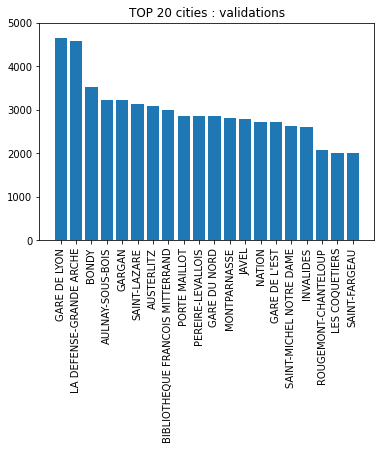

In [16]:
preproc = preproc.sort_values('Total', ascending=False)
plt.bar(preproc["LIBELLE_ARRET"][1:21], preproc["Total"][1:21])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim([0, 5000])
plt.title("TOP 20 cities : validations")
plt.show()

In [17]:
data_test

,LIBELLE_ARRET,NB_VALD
0,LES PAVILLONS-SOUS-BOIS,11
1,LYCEE HENRI SELLIER,1
2,LYCEE HENRI SELLIER,44
3,LYCEE HENRI SELLIER,1
4,L'ABBAYE,7
...,...,...
835136,SAINT-PHILIPPE-DU-ROULE,19
835137,SAINT-PHILIPPE-DU-ROULE,18
835138,SAINT-SEBASTIEN FROISSART,37
835139,SAINT-SULPICE,41


## Prepare the data for classification model

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



train_prop = int(0.8 * len(data))

X_train = data["NB_VALD"][0:train_prop].values
X_train = X_train.astype('float32')
X_train = X_train.reshape(-1, 1)


y_train = data["CATEGORIE_TITRE"][0:train_prop].values
y_train = y_train.reshape(-1, 1)

X_test = data["NB_VALD"][train_prop:].values
X_test = X_test.reshape(-1, 1)

y_test = data["CATEGORIE_TITRE"][train_prop:].values
y_test = y_test.reshape(-1, 1)


### Dummy Classifier

In [19]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.22550575049841645

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=10, max_features='auto', oob_score=True, random_state=1)
rfclf.fit(X_train,y_train)
rfclf.score(X_test, y_test)


0.2893030551580863

### KMeans clustering

In [86]:
kmeans = KMeans(n_clusters=8, random_state=0)

In [87]:
kmeans.fit(X_train)

KMeans(random_state=0)

In [90]:
predictions = kmeans.predict(X_train)

In [91]:
confusion_matrix(y_train, predictions)

array([[150509,      0,      0,      0,    109,   1212,      0,      0,
             0],
       [ 66829,    110,      0,      0,   2649,  16780,      0,    512,
             0],
       [ 78355,      0,      0,      0,    460,   4612,      0,     43,
             0],
       [ 45408,      0,      0,      0,      1,    733,      0,      0,
             0],
       [ 74164,      0,      0,      0,      0,    225,      0,      0,
             0],
       [ 82023,      0,      0,      0,    132,   2097,      0,      0,
             0],
       [ 52885,   2344,    503,     76,  12594,  19326,    125,   6174,
             0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0],
       [ 47122,      0,      0,      0,      0,      0,      0,      0,
             0]], dtype=int64)

In [92]:
acc = round(100 * accuracy_score(y_train, predictions), 2)

print("Accuracy =", acc, "%")

Accuracy = 22.88 %


#### Ways to Improve Performance

- Visualize data with t-SNE (determine if data is linearly separable or not)
- Does data contain patterns we can exploit ? 
- which station is directly correlated with the number of validations ? which ones are not ? 
- Does data need more preparation ? Do we need to extract features ? 

## Time Series Forecasting

#### What will be the prediction for the validation with the station "M. MONTROUGE" & "OLYMPIADES" between 24th - 30th of june ?

In [130]:
def getIndexes(dfObj, value):
    listOfPos = list()
    result = dfObj.isin([value])
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    return listOfPos

In [20]:
data_time_series = dict(list(data.groupby("LIBELLE_ARRET")))

In [21]:
data_ref = pd.DataFrame(data_time_series["OLYMPIADES"]).reset_index(drop=True)
data_ref = data_ref.sort_values(by="JOUR")

tst = data_ref["NB_VALD"].values
dates = data_ref["JOUR"].values


tst = tst.astype('float32')

In [22]:
data_ref.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
698,2020-01-01,100,110,1006,OLYMPIADES,71557.0,0,23
159,2020-01-01,100,110,1006,OLYMPIADES,71557.0,5,160
835,2020-01-01,100,110,1006,OLYMPIADES,71557.0,1,788
376,2020-01-01,100,110,1006,OLYMPIADES,71557.0,3,82
161,2020-01-01,100,110,1006,OLYMPIADES,71557.0,8,1


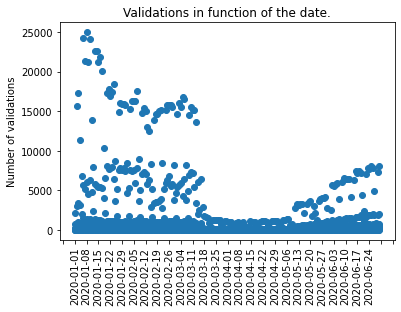

In [23]:
plt.scatter(dates, tst)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title("Validations in function of the date.")
plt.ylabel("Number of validations")
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.show()

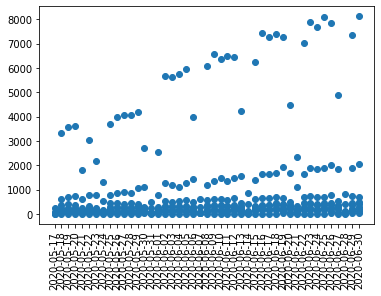

In [24]:
plt.scatter(dates[1200:], tst[1200:])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [25]:
from pydlm import dlm, trend, seasonality
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=5)
# A seasonality
seasonal52 = seasonality(period=50, discount=0.99, name='seasonal52', w=1)
# Build a simple dlm
simple_dlm = dlm(tst) + linear_trend + seasonal52 

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


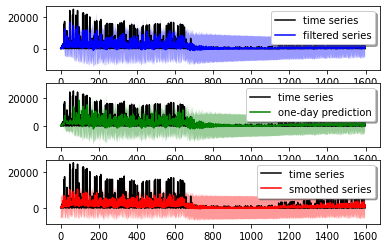

In [26]:
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [307]:
simple_dlm.getMSE()


14624864.437540956

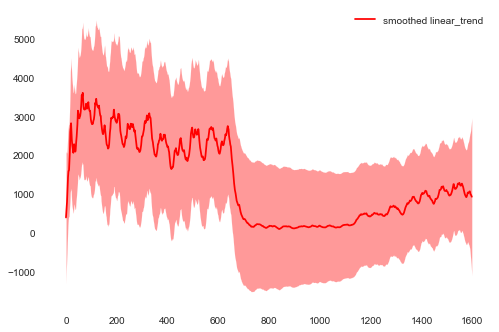

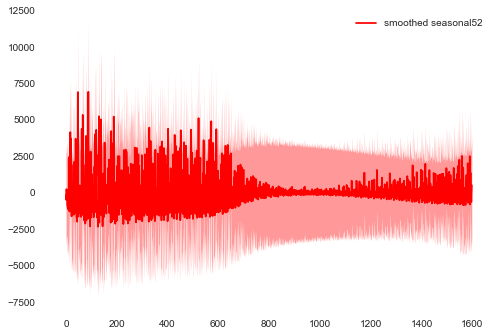

In [308]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

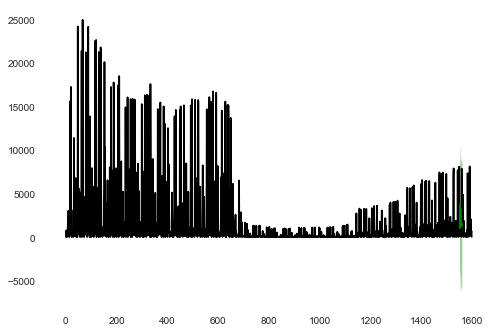

In [309]:
# Plot the prediction give the first 351 weeks and forcast the next 200 weeks.
simple_dlm.plotPredictN(date=1550, N=10)

In [310]:
simple_dlm.predict(date=5)

(matrix([[114.65119373]]), matrix([[117746.53367095]]))

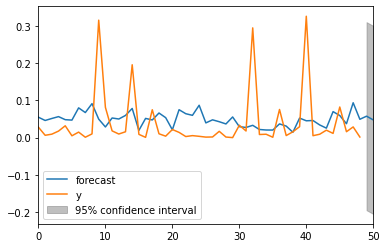

In [42]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tst = tst.reshape(-1, 1)
tst_proc = scaler.fit_transform(tst)

# Forecast the first AR(1) model
mod = ARMA(tst_proc, order=(15,0))
res = mod.fit()
res.plot_predict(start=1550, end=1600)
plt.show()